In [ ]:
!pip install mtcnn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.7 MB/s eta 0:00:00


In [34]:
import cv2
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


In [ ]:
img = cv2.imread('/content/1.jpg')

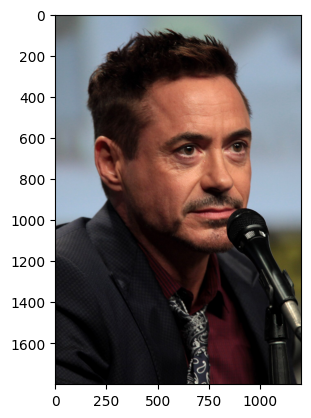

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
from mtcnn.mtcnn import MTCNN
detector = MTCNN()
results = detector.detect_faces(img)

In [ ]:
results


[{'box': [403, 315, 530, 834],
  'confidence': 0.9995986819267273,
  'keypoints': {'nose': [827, 831],
   'mouth_right': [863, 948],
   'right_eye': [869, 652],
   'left_eye': [641, 667],
   'mouth_left': [642, 959]}}]

In [ ]:
x,y,w,h = results[0]['box']

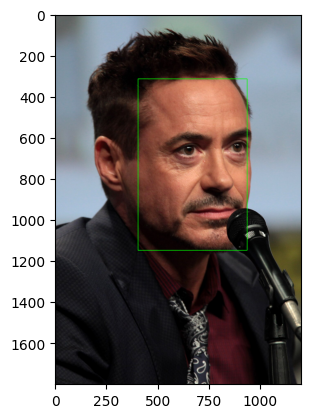

In [ ]:
img = cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)
plt.imshow(img)

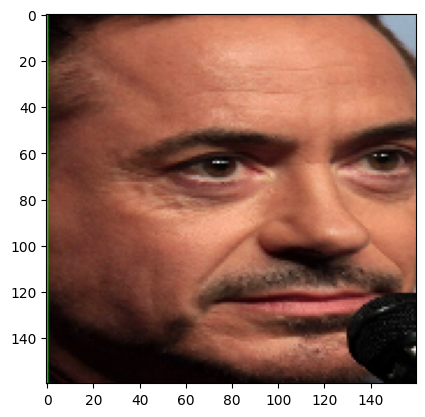

In [ ]:
my_face = img[y:y+h, x:x+w]
my_face = cv2.resize(my_face, (160,160))
plt.imshow(my_face)

array([[[  0, 215,   0],
        [  2,   1,   1],
        [  5,   3,   4],
        ...,
        [159, 177, 199],
        [158, 177, 199],
        [156, 177, 198]],

       [[  0, 215,   0],
        [  3,   1,   2],
        [  2,   1,   1],
        ...,
        [159, 180, 199],
        [157, 179, 198],
        [156, 179, 197]],

       [[  1, 215,   0],
        [  6,   1,   3],
        [  9,   1,   4],
        ...,
        [160, 178, 198],
        [159, 179, 198],
        [154, 175, 194]],

       ...,

       [[  1, 216,   1],
        [  1,   3,   5],
        [  1,   1,   3],
        ...,
        [  3,   3,   4],
        [  6,   6,   7],
        [  7,   8,   8]],

       [[  1, 216,   1],
        [  5,   5,   7],
        [  2,   2,   4],
        ...,
        [  2,   2,   4],
        [  2,   3,   5],
        [  2,   3,   5]],

       [[  2, 217,   2],
        [ 11,  11,  13],
        [ 11,  11,  13],
        ...,
        [  2,   2,   4],
        [  0,   0,   2],
        [  1,   2,   4]]], dtype=uint8)
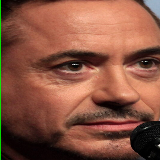

In [ ]:
my_face

In [ ]:
!unzip DataSet.zip


Archive:  DataSet.zip
   creating: DataSet/
  inflating: DataSet/.DS_Store       
  inflating: __MACOSX/DataSet/._.DS_Store  
   creating: DataSet/Robert/
   creating: DataSet/Garthi/
  inflating: __MACOSX/DataSet/._Garthi  
  inflating: DataSet/Robert/.DS_Store  
  inflating: __MACOSX/DataSet/Robert/._.DS_Store  
  inflating: DataSet/Robert/8.jpg    
  inflating: __MACOSX/DataSet/Robert/._8.jpg  
  inflating: DataSet/Robert/9.jpg    
  inflating: __MACOSX/DataSet/Robert/._9.jpg  
  inflating: DataSet/Robert/7.jpeg   
  inflating: __MACOSX/DataSet/Robert/._7.jpeg  
  inflating: DataSet/Robert/10.jpg   
  inflating: __MACOSX/DataSet/Robert/._10.jpg  
  inflating: DataSet/Robert/4.jpg    
  inflating: __MACOSX/DataSet/Robert/._4.jpg  
  inflating: DataSet/Robert/5.jpg    
  inflating: __MACOSX/DataSet/Robert/._5.jpg  
  inflating: DataSet/Robert/6.jpg    
  inflating: __MACOSX/DataSet/Robert/._6.jpg  
  inflating: DataSet/Robert/2.png    
  inflating: __MACOSX/DataSet/Robert/._2.png  
  

In [35]:
class FACELOADING:
  def __init__(self, directory):
    self.directory = directory
    self.target_size = (160,160)
    self.X = []
    self.Y = []
    self.detector = MTCNN()

  def extract_face(self, filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    x,y,w,h = self.detector.detect_faces(img)[0]['box']
    x,y = abs(x), abs(y)
    face = img[y:y+h, x:x+w]
    face_arr = cv2.resize(face, self.target_size)
    return face_arr

  def load_faces(self):
    FACES = []
    for im_name in os.listdir(dir):
      try:
        path = dir + im_name
        single_face = self.extract_face(path)
        FACES.append(single_face)
      except Exception as e:
        pass
    return FACES

  def load_classes(self):
    for sub_dir in os.listdir(self.directory):
      path = self.directory +'/'+ sub_dir+'/'
      FACES = self.load_faces(path)
      labels = [sub_dir for _ in range(len(FACES))]
      print(f"Loaded Successfully: {len(labels)}")
      self.X.extend(FACES)
      self.Y.extend(labels)

    return np.asarray(self.X), np.asarray(self.Y)

  def plot_images(self):
    for num,image in enumerate(seld.X):
      ncols=3
      nrows=len(self.Y)//ncols
      plt.subplot(nrows, ncols, num+1)
      plt.imshow(image)
      plt.axis('off')

In [38]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160, 160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()

    def extract_face(self, filename):
        try:
            img = cv2.imread(filename)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            detection = self.detector.detect_faces(img)
            if not detection:
                raise ValueError("No face detected")
            x, y, w, h = detection[0]['box']
            x, y = abs(x), abs(y)
            face = img[y:y+h, x:x+w]
            face_arr = cv2.resize(face, self.target_size)
            return face_arr
        except Exception as e:
            print(f"Error processing {filename}: {e}")
            return None

    def load_faces(self, path):
        FACES = []
        for im_name in os.listdir(path):
            try:
                file_path = os.path.join(path, im_name)
                single_face = self.extract_face(file_path)
                if single_face is not None:
                    FACES.append(single_face)
            except Exception as e:
                print(f"Error loading image {im_name}: {e}")
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            sub_path = os.path.join(self.directory, sub_dir)
            if os.path.isdir(sub_path):
                FACES = self.load_faces(sub_path)
                labels = [sub_dir for _ in range(len(FACES))]
                print(f"Loaded Successfully: {len(labels)} faces for class '{sub_dir}'")
                self.X.extend(FACES)
                self.Y.extend(labels)

        return np.asarray(self.X), np.asarray(self.Y)

    def plot_images(self):
        ncols = 3
        nrows = -(-len(self.X) // ncols)  # Ceiling division for rows
        plt.figure(figsize=(12, 8))
        for num, image in enumerate(self.X):
            plt.subplot(nrows, ncols, num + 1)
            plt.imshow(image)
            plt.axis('off')
        plt.tight_layout()
        plt.show()

Error processing /content/DataSet/Robert/.DS_Store: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Loaded Successfully: 10 faces for class 'Robert'
Loaded Successfully: 10 faces for class 'Garthi'
Data shape: (20, 160, 160, 3), Labels: (20,)


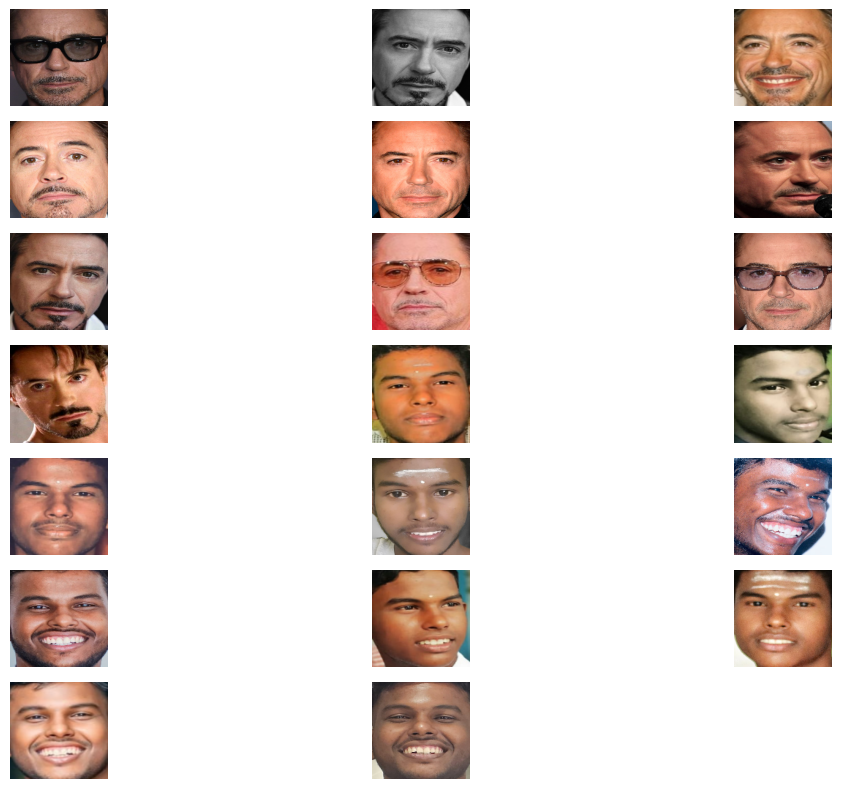

In [40]:
directory = "/content/DataSet"
face_loader = FACELOADING(directory)

# Load data
X, Y = face_loader.load_classes()
print(f"Data shape: {X.shape}, Labels: {Y.shape}")

# Plot some images
face_loader.plot_images()

**FACE NET PART**

In [41]:
!pip install keras-facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10368 sha256=ef2af45077facdc93bba12b2daa1e760979db7297695a5299e8b13a8e76ac02c
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [48]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32')
    face_img = np.expand_dims(face_img, axis=0)
    yhat = embedder.embeddings(face_img)
    return yhat[0]


In [49]:
EMBEDDED_X = []

for img in X:
  EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)
print(EMBEDDED_X.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
(20, 512)


In [50]:
np.savez_compressed('faces-embeddings_done_2classes.npz', EMBEDDED_X, Y)

In [61]:
EMBEDDED_X.shape

(20, 512)

#SVM MODEL

In [52]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)


In [53]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=17)


In [58]:
from sklearn.svm import SVC

model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [59]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_train, ypreds_train))
print(accuracy_score(Y_test, ypreds_test))

1.0
1.0


In [65]:
accuracy = accuracy_score(Y_test, ypreds_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [66]:
import joblib
joblib.dump(model, 'svm_face_recognition_model1.pkl')


['svm_face_recognition_model1.pkl']

In [68]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(Y_test, ypreds_test, target_names=encoder.classes_))


Classification Report:
              precision    recall  f1-score   support

      Garthi       1.00      1.00      1.00         2
      Robert       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(probability=True), param_grid, cv=5)
grid.fit(X_train, Y_train)

print("Best Parameters:", grid.best_params_)
model = grid.best_estimator_


Best Parameters: {'C': 1, 'kernel': 'linear'}


In [70]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, EMBEDDED_X, Y, cv=5)
print(f"Cross-Validation Accuracy: {scores.mean():.2f}")


Cross-Validation Accuracy: 1.00


In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
